In [338]:
#БИБЛИОТЕКИ
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [339]:
#ДАННЫЕ
df = pd.read_csv("garments_worker_productivity.csv", delimiter = ',')

In [340]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [341]:
#УДАЛЕНИЕ ТЕКСТОВЫХ ПОЛЕЙ И ПОЛЯ С ДАТОЙ
df = df.drop(['date', 'quarter', 'day', 'wip'], axis=1)

In [342]:
df['department'] = df['department'].apply(lambda x: 1 if x=='sweing' else 0)

In [343]:
df.head()

,department,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,0,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


In [345]:
#ВЫБОРКИ ДЛЯ МОДЕЛИ
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [346]:
#КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 2, 6])], remainder='passthrough')
X = ct.fit_transform(X)

In [347]:
#МАСШТАБИРОВАНИЕ ДАННЫХ
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [348]:
#РАЗДЕЛЕНИЕ ДАННЫХ НА ТРЕНИРОВОЧНЫЙ И ТЕСТОВЫЙ НАБОРЫ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [349]:
#СОЗДАНИЕ МОДЕЛИ
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [350]:
#КОМПИЛЯЦИЯ МОДЕЛИ
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [351]:
#ОБУЧЕНИЕ МОДЕЛИ
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
30/30 [==============================] - 1s 9ms/step - loss: 0.6756 - accuracy: 0.0000e+00 - val_loss: 0.6013 - val_accuracy: 0.0000e+00
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 0.6304 - accuracy: 0.0000e+00 - val_loss: 0.5772 - val_accuracy: 0.0000e+00
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.6045 - accuracy: 0.0000e+00 - val_loss: 0.5631 - val_accuracy: 0.0000e+00
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.0000e+00 - val_loss: 0.5556 - val_accuracy: 0.0000e+00
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.0000e+00 - val_loss: 0.5516 - val_accuracy: 0.0000e+00
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.0000e+00 - val_loss: 0.5490 - val_accuracy: 0.0000e+00
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5657 - accuracy: 0.0000e+00 - val_loss

In [352]:
#ОЦЕНКА МОДЕЛИ НА ТЕСТОВОМ НАБОРЕ ДАННЫХ
_, accuracy = model.evaluate(X_test, y_test)
print('Качество(точность): %.4f' % (accuracy*100))

8/8 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.0000e+00
Качество(точность): 0.0000


In [356]:
#ПРИМЕР ИСПОЛЬЗОВАНИЯ МОДЕЛИ ДЛЯ ПРЕДСКАЗАНИЯ КЛАССА
test_sample = np.array([1, 8, 0.8, 2, 2, 4, 0, 0, 1, 2]).reshape(1, -1)
test_sample = ct.transform(test_sample) # преобразование категориальных признаков
test_sample = scaler.transform(test_sample) # масштабирование

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [357]:
predicted_class = model.predict(test_sample)[0][0]

1/1 [==============================] - 0s 68ms/step


In [358]:
#ВЕРОЯТНОСТЬ ПРИНАДЛЕЖНОСТИ К КЛАССУ 1
print('Predicted class probability:', predicted_class)

Predicted class probability: 0.71883863


In [359]:
#ОКРУГЛЕНИЕ ВЕРОЯТНОСТИ, ПРЕВРАЩЕНИЕ В ЦЕЛОЧИСЛЕННЫЙ КЛАСС
predicted_class = int(np.round(predicted_class))
print('Predicted class:', predicted_class)

Predicted class: 1


Epoch 1/50
30/30 [==============================] - 0s 5ms/step - loss: 0.5470 - accuracy: 0.0000e+00 - val_loss: 0.5353 - val_accuracy: 0.0000e+00
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.0000e+00 - val_loss: 0.5350 - val_accuracy: 0.0000e+00
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5468 - accuracy: 0.0000e+00 - val_loss: 0.5351 - val_accuracy: 0.0000e+00
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.0000e+00 - val_loss: 0.5349 - val_accuracy: 0.0000e+00
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5465 - accuracy: 0.0000e+00 - val_loss: 0.5348 - val_accuracy: 0.0000e+00
Epoch 6/50
30/30 [==============================] - 0s 6ms/step - loss: 0.5464 - accuracy: 0.0000e+00 - val_loss: 0.5348 - val_accuracy: 0.0000e+00
Epoch 7/50
30/30 [==============================] - 0s 8ms/step - loss: 0.5465 - accuracy: 0.0000e+00 - val_loss

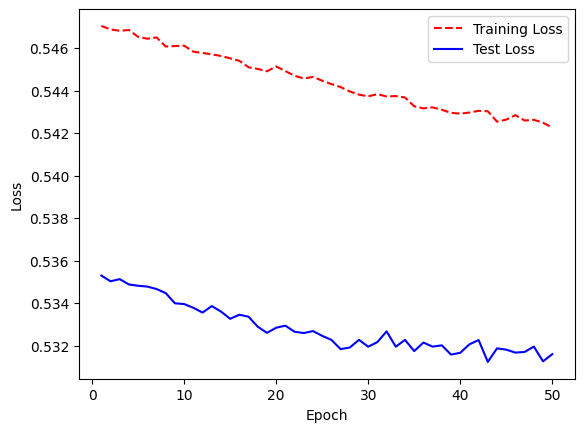

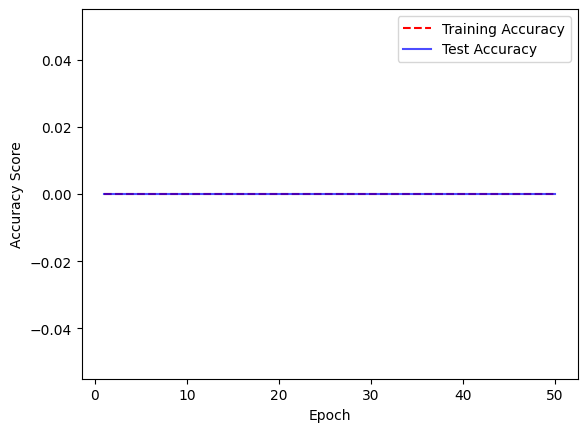

In [360]:
# График точности и функции потерь
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-', alpha=0.7)
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show()